### Chargement des librarires :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Chargement des bases de données liées aux caracteristiques pour les années 2017 à 2021 :


In [2]:
df_caracteristiques_2021 = pd.read_csv("data/caracteristiques-2021.csv", sep=';')
df_caracteristiques_2020 = pd.read_csv("data/caracteristiques-2020.csv", sep=';')
df_caracteristiques_2019 = pd.read_csv("data/caracteristiques-2019.csv", sep=';')
df_caracteristiques_2018 = pd.read_csv("data/caracteristiques-2018.csv", sep=',')
df_caracteristiques_2017 = pd.read_csv("data/caracteristiques-2017.csv", sep=',')

### Fusion et nettoyage des dataframes :

In [3]:
df = [df_caracteristiques_2017, df_caracteristiques_2018, df_caracteristiques_2019, df_caracteristiques_2020, df_caracteristiques_2021]
caracteristiques_2017_2021 = pd.concat(df)

In [4]:
caracteristiques_2017_2021 = caracteristiques_2017_2021.rename(columns={'jour':'day', 'mois':'month', 'an':'year'})

In [5]:
caracteristiques_2017_2021['year'] = caracteristiques_2017_2021['year'].replace(17, 2017)
caracteristiques_2017_2021['year'] = caracteristiques_2017_2021['year'].replace(18, 2018)

In [6]:
caracteristiques_2017_2021

,Num_Acc,year,month,day,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201700000001,2017,1,11,1820,5,2,1,1.0,1.0,477,rue nationale,M,5051326.0,292191.0,590
1,201700000002,2017,2,13,1630,1,2,3,1.0,3.0,5,5 rue sonneville,M,5053611.0,295314.0,590
2,201700000003,2017,3,7,1150,1,2,9,1.0,5.0,52,rue Jules Guesde,M,5052174.0,288786.0,590
3,201700000004,2017,4,22,1300,1,2,1,1.0,6.0,5,46 rue Sonneville,M,5053723.0,295700.0,590
4,201700000005,2017,5,20,1230,1,2,1,1.0,2.0,11,Rue roger salengro,M,5052999.0,293798.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,2021,1,1,06:10,3,1,1,5.0,6.0,33021,NaN,NaN,"44,5266190000","-0,1955440000",33
56514,202100056515,2021,1,1,10:20,1,1,1,2.0,6.0,38405,D520,NaN,"45,3802910000","5,7049140000",38
56515,202100056516,2021,1,1,18:00,3,1,1,2.0,1.0,26064,Route départementale 538,NaN,"44,9112100000","5,0196360000",26
56516,202100056517,2021,1,1,10:55,1,1,2,1.0,6.0,33003,Voie rapide Bassens Ambes,NaN,"44,9542747363","-0,5179211363",33


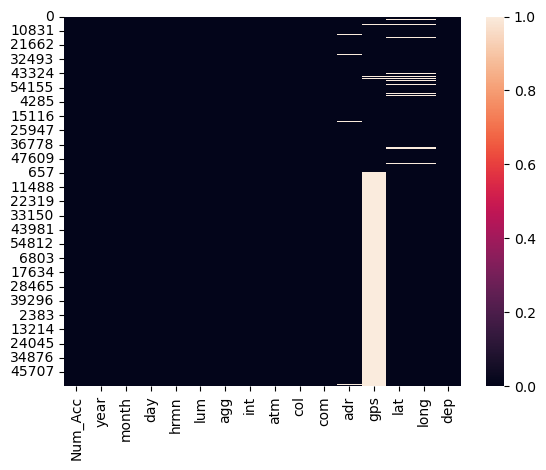

In [7]:
#Visualisation des valeurs manquantes à l'aide d'une carte thermique
sns.heatmap(caracteristiques_2017_2021.isna());

In [8]:
#Recodage des -1 (non renseigné) par des NaN
caracteristiques_2017_2021 = caracteristiques_2017_2021.replace(-1, np.nan)
#suppression de la variable 'gps' inexploitable (trois années de valeurs manquantes)
caracteristiques_2017_2021 = caracteristiques_2017_2021.drop('gps', axis=1)

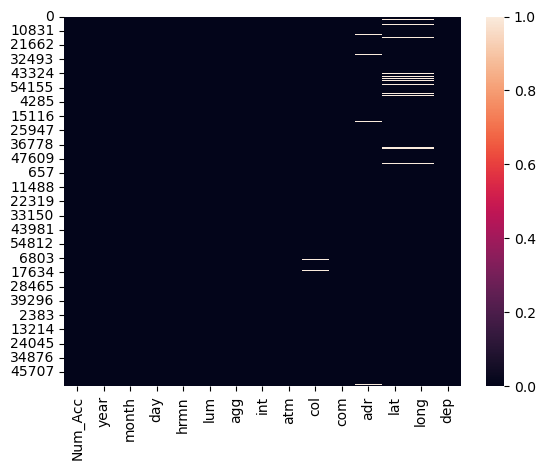

In [9]:
#Visualisation des valeurs manquantes après nettoyage
sns.heatmap(caracteristiques_2017_2021.isna());

In [10]:
#Recodage des 0 (sans objet) par des NaN
caracteristiques_2017_2021 = caracteristiques_2017_2021.replace(0, np.nan)

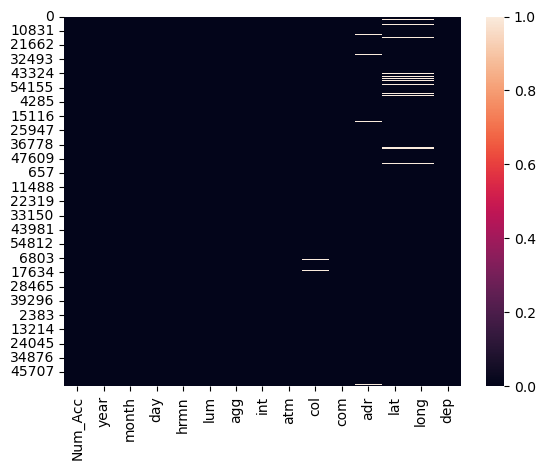

In [11]:
#Visualisation des valeurs manquantes après nettoyage
sns.heatmap(caracteristiques_2017_2021.isna());

In [12]:
#export du df final
caracteristiques_2017_2021.to_csv("merged_tables/caracteristiques_2017_2021.csv", index=False)

### Quelques statistiques descriptives...

In [13]:
#Nb d'accidents par année :
caracteristiques_2017_2021['year'].value_counts()

2017    60701
2019    58840
2018    57783
2021    56518
2020    47744
Name: year, dtype: int64

<Axes: >

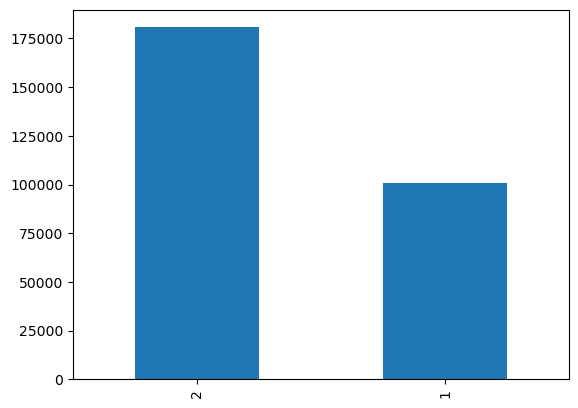

In [14]:
#Accidents ayant eu lieu hors agglomération (1) et en agglomération (2)
caracteristiques_2017_2021['agg'].value_counts().plot(kind='bar')

In [15]:
# Les trois mois regroupant le plus d'accidents sur les cinq années sont les suivants : Septembre, Juin et Octobre
caracteristiques_2017_2021['month'].value_counts().sort_values(ascending=False)

9     27271
6     27210
10    27143
7     26703
5     23318
12    23318
11    22754
8     22432
1     21670
3     20683
4     19610
2     19474
Name: month, dtype: int64

In [16]:
# Le vendredi est le jour de la semaine regroupant le plus d'accidents, le dimanche est le jour le moins accidenté
caracteristiques_2017_2021['full_date'].dt.day_name().value_counts()

AttributeError: Can only use .dt accessor with datetimelike values